In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

from BSE import market_session

In [2]:
def make_trader_spec(n, ttype):
    """
    n: number of buyers AND sellers
    ttype: 'ZIP' or 'ZIC'
    """
    return {
        'n_buyers': n,
        'n_sellers': n,
        'buyers':  [(ttype, n)],
        'sellers': [(ttype, n)],
        'marketmakers': []
    }

In [3]:
def make_order_schedule(start, end, interval=30):
    """
    Correct static symmetric linear supply and demand schedule
    for AY25/26 BSE version.
    """

    demand_range = (50, 150)   

    supply_range = (50, 150)

    return {
        'dem': [{
            'from': start,
            'to': end,
            'ranges': [demand_range],
            'stepmode': 'fixed'
        }],
        'sup': [{
            'from': start,
            'to': end,
            'ranges': [supply_range],
            'stepmode': 'fixed'
        }],
        'interval': interval,
        'timemode': 'drip-poisson'
    }

In [4]:
dump_flags = {
    'dump_strats': False,
    'dump_lobs': False,
    'dump_avgbals': False,
    'dump_tape': False,
    'dump_blotters': False,
}

In [5]:
def run_one_session(ttype, n=50, sess_id="q1", 
                    start=0, end=600, seed=None):

    if seed is not None:
        random.seed(seed)

    trader_spec = make_trader_spec(n, ttype)
    order_schedule = make_order_schedule(start, end)

    traders = market_session(sess_id, start, end, 
                             trader_spec, order_schedule,
                             dump_flags, sess_vrbs=False)

    profits = []
    for t in traders.values():
        if hasattr(t, "profit"):
            profits.append(t.profit)
        else:
            profits.append(t.balance)
    return np.array(profits)

In [6]:
def experiment_q1(n_sessions=30, n_traders=50):
    zip_means = []
    zic_means = []

    for i in range(n_sessions):
        seed = 1000 + i   

        zip_p = run_one_session('ZIP', n_traders, sess_id=f"ZIP_{i}", seed=seed)
        zic_p = run_one_session('ZIC', n_traders, sess_id=f"ZIC_{i}", seed=seed)

        zip_means.append(zip_p.mean())
        zic_means.append(zic_p.mean())

    return np.array(zip_means), np.array(zic_means)

zip_means, zic_means = experiment_q1()

In [7]:
t_stat, p_val = ttest_ind(zip_means, zic_means, equal_var=False)

print("ZIP mean profit:", zip_means.mean())
print("ZIC mean profit:", zic_means.mean())
print("t-statistic:", t_stat)
print("p-value:", p_val)

ZIP mean profit: 41.552666666666674
ZIC mean profit: 217.9646666666667
t-statistic: -54.430609602639414
p-value: 1.7552012680782692e-31


C:\Users\xuyel\AppData\Local\Temp\ipykernel_41228\4251147230.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([zip_means, zic_means], labels=['ZIP', 'ZIC'])


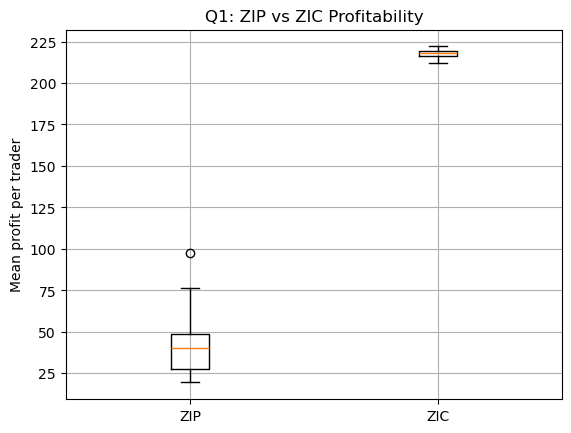

In [8]:
plt.boxplot([zip_means, zic_means], labels=['ZIP', 'ZIC'])
plt.ylabel("Mean profit per trader")
plt.title("Q1: ZIP vs ZIC Profitability")
plt.grid(True)
plt.show()